In [1]:
import tkinter as tk

In [3]:
# root = tk.Tk()
# root.mainloop()

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# User Data
users = {
    "emeka anyanwu": {"email": "chukwuemekaanyanwu322@gmail.com", "age": 18},
    "bona chukwu": {"email": "bonachukwu1@gmail.com", "age": 17},
    "tabitha udezi": {"email": "tabithaudezi23@gmail.com", "age": 23},
    "abdullah salami": {"email": "abdullahsalami343@gmail.com", "age": 26},
}

# Define folders for each art collection
art_collections = {
    "cont_art": "./images/cont_art/",
    "modern_art": "./images/modern_art/",
    "trad_art": "./images/trad_art/"
}

class Project:
    def __init__(self, username, email):
        self.username = username.lower()
        self.email = email
            
    def verify_user(self, users):
        if self.username in users and users[self.username]["email"] == self.email:
            user_age = users[self.username]["age"]
            if user_age >= 18:
                print(f"Welcome, {self.username.capitalize()}! You have access.")
                return True
            else:
                print("Access restricted. You must be at least 18.")
                return False
        print("User not found or incorrect email.")
        return False

    def display_images_in_category(self, category, art_collections):
        category = category.lower()
        if category not in art_collections:
            print(f"Category '{category}' not found!")
            return

        folder_path = art_collections[category]
        if not os.path.exists(folder_path):
            print(f"Error: Folder '{folder_path}' does not exist!")
            return

        images = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
        if not images:
            print(f"No images found in '{category}'.")
            return

        print(f"\nDisplaying images from category: {category}")

        fig, axes = plt.subplots(1, len(images), figsize=(5 * len(images), 5))
        if len(images) == 1:
            axes = [axes]

        for ax, image_filename in zip(axes, images):
            image_path = os.path.join(folder_path, image_filename)
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error: Image '{image_filename}' not found!")
                continue

            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ax.imshow(image_rgb)
            ax.set_title(image_filename)
            ax.axis("off")

        plt.show()

        while True:
            selected_image = input("Enter image name to transform (or 'exit' to quit): ").strip()
            if selected_image.lower() == 'exit':
                print("Exiting program...")
                return
            if selected_image not in images:
                print("Invalid image name. Try again.")
                continue

            image_path = os.path.join(folder_path, selected_image)
            image = cv2.imread(image_path)
            if image is not None:
                self.apply_transformations(image, selected_image)

    def apply_transformations(self, image, image_name):
        transformations = {
            "1": ("Grayscale", lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)),
            "2": ("Edge Detection (Canny)", lambda img: cv2.Canny(img, 100, 200)),
            "3": ("Gaussian Blur", lambda img: cv2.GaussianBlur(img, (15, 15), 0)),
            "4": ("Rotate 90 degrees", lambda img: cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)),
            "5": ("Reflection", lambda img: cv2.warpPerspective(img, np.float32([[1, 0, 0], [0, -1, img.shape[0]], [0, 0, 1]]), (img.shape[1], img.shape[0]))),
            "6": ("Translation", lambda img: cv2.warpAffine(img, np.float32([[1, 0, 100], [0, 1, 50]]), (img.shape[1], img.shape[0]))),
            "7": ("Cropping", lambda img: img[50:250, 50:250]),
            "8": ("Rotation (30 degrees)", lambda img: cv2.warpAffine(img, cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), 30, 0.6), (img.shape[1], img.shape[0]))),
            "9": ("Shearing X-axis", lambda img: cv2.warpPerspective(img, np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]]), (int(img.shape[1] * 1.5), img.shape[0]))),
            "10": ("Shearing Y-axis", lambda img: cv2.warpPerspective(img, np.float32([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]]), (img.shape[1], int(img.shape[0] * 1.5))))
        }
        
        print("\nSelect a transformation:")
        for key, (name, _) in transformations.items():
            print(f"{key}. {name}")
        print("11. Exit transformations")

        while True:
            choice = input("Enter your choice: ").strip()
            if choice == "11":
                print("Exiting transformations...\n")
                return
            elif choice in transformations:
                transform_name, transform_func = transformations[choice]
                transformed_image = transform_func(image)
                plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
                plt.title(f"{transform_name} - {image_name}")
                plt.axis("off")
                plt.show()
                cv2.imwrite(f"transformed_{image_name}", transformed_image)
            else:
                print("Invalid choice. Try again.")

root = tk.Tk()


label = tk.Label(root,text = 'Enter your username: ', font = ('Arial', 18))
label.pack(padx = 10, pady = 10)

# Get user input
username_input = input("Enter your username: ").strip().lower()
email_input = input("Enter your email: ").strip()



# Initialize Project
project = Project(username=username_input, email=email_input)

# Verify user
if project.verify_user(users):
    while True:
        category_input = input("Enter an art category (cont_art, modern_art, trad_art) or 'exit' to quit: ").strip().lower()
        if category_input == 'exit':
            print("Exiting program...")
            break
        project.display_images_in_category(category_input, art_collections)

root.mainloop()

Enter your username:  
Enter your email:  


User not found or incorrect email.


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox, simpledialog, filedialog
from PIL import Image, ImageTk

# User Data
users = {
    "emeka anyanwu": {"email": "chukwuemekaanyanwu322@gmail.com", "age": 18},
    "bona chukwu": {"email": "bonachukwu1@gmail.com", "age": 17},
    "tabitha udezi": {"email": "tabithaudezi23@gmail.com", "age": 23},
    "abdullah salami": {"email": "abdullahsalami343@gmail.com", "age": 26},
}

# Art collections
art_collections = {
    "cont_art": "./images/cont_art/",
    "modern_art": "./images/modern_art/",
    "trad_art": "./images/trad_art/"
}

class ArtApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Art Viewer & Transformer")
        self.root.geometry("500x400")
        
        self.label = tk.Label(root, text="Enter your details", font=("Arial", 16))
        self.label.pack(pady=10)
        
        self.username_label = tk.Label(root, text="Username:")
        self.username_label.pack()
        self.username_entry = tk.Entry(root)
        self.username_entry.pack()
        
        self.email_label = tk.Label(root, text="Email:")
        self.email_label.pack()
        self.email_entry = tk.Entry(root)
        self.email_entry.pack()
        
        self.login_button = tk.Button(root, text="Login", command=self.verify_user)
        self.login_button.pack(pady=10)
        
    def verify_user(self):
        username = self.username_entry.get().strip().lower()
        email = self.email_entry.get().strip()
        
        if username in users and users[username]["email"] == email:
            user_age = users[username]["age"]
            if user_age >= 18:
                messagebox.showinfo("Access Granted", f"Welcome {username.capitalize()}!")
                self.select_category()
            else:
                messagebox.showwarning("Access Denied", "You must be at least 18.")
        else:
            messagebox.showerror("Error", "Invalid credentials.")
    
    def select_category(self):
        category = simpledialog.askstring("Select Category", "Enter category (cont_art, modern_art, trad_art):").strip().lower()
        if category in art_collections:
            self.display_images(category)
        else:
            messagebox.showerror("Error", "Invalid category.")
    
    def display_images(self, category):
        folder_path = art_collections[category]
        if not os.path.exists(folder_path):
            messagebox.showerror("Error", f"Folder '{folder_path}' not found!")
            return
        
        images = [f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png", ".jpeg"))]
        if not images:
            messagebox.showwarning("No Images", "No images found in this category.")
            return
        
        img_window = tk.Toplevel(self.root)
        img_window.title("Select an Image")
        
        for img_name in images:
            img_path = os.path.join(folder_path, img_name)
            image = Image.open(img_path)
            image.thumbnail((150, 150))
            img_tk = ImageTk.PhotoImage(image)
            
            btn = tk.Button(img_window, image=img_tk, command=lambda path=img_path: self.apply_transformations(path))
            btn.image = img_tk
            btn.pack()
    
    def apply_transformations(self, image_path):
        image = cv2.imread(image_path)
        
        transformations = {
            "Grayscale": lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
            "Edge Detection": lambda img: cv2.Canny(img, 100, 200),
            "Gaussian Blur": lambda img: cv2.GaussianBlur(img, (15, 15), 0),
            "Rotate 90°": lambda img: cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        }
        
        transform_window = tk.Toplevel(self.root)
        transform_window.title("Select a Transformation")
        
        for name, func in transformations.items():
            btn = tk.Button(transform_window, text=name, command=lambda n=name, f=func: self.show_transformed_image(image, image_path, n, f))
            btn.pack()
    
    def show_transformed_image(self, image, image_path, name, func):
        transformed_image = func(image)
        
        plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
        plt.title(f"{name}")
        plt.axis("off")
        plt.show()
        
        save_path = f"transformed_{os.path.basename(image_path)}"
        cv2.imwrite(save_path, transformed_image)
        messagebox.showinfo("Saved", f"Transformed image saved as {save_path}")

# Run the application
root = tk.Tk()
app = ArtApp(root)
root.mainloop()


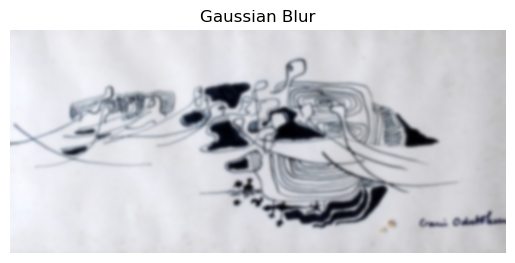

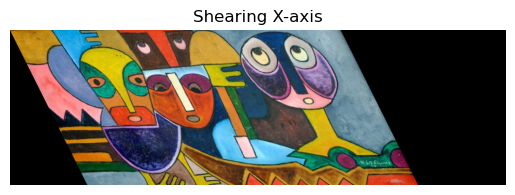

In [31]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox, simpledialog, filedialog
from PIL import Image, ImageTk

# User Data
users = {
    "emeka anyanwu": {"email": "chukwuemekaanyanwu322@gmail.com", "age": 18},
    "bona chukwu": {"email": "bonachukwu1@gmail.com", "age": 17},
    "tabitha udezi": {"email": "tabithaudezi23@gmail.com", "age": 23},
    "abdullah salami": {"email": "abdullahsalami343@gmail.com", "age": 26},
}

# Art collections
art_collections = {
    "cont_art": "./project/images/cont_art/",
    "modern_art": "./project/images/modern_art/",
    "trad_art": "./project/images/trad_art/"
}

class ArtApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Art Viewer & Transformer")
        self.root.geometry("500x400")
        
        self.label = tk.Label(root, text="Enter your details", font=("Arial", 16))
        self.label.pack(pady=10)
        
        self.username_label = tk.Label(root, text="Username:")
        self.username_label.pack()
        self.username_entry = tk.Entry(root)
        self.username_entry.pack()
        
        self.email_label = tk.Label(root, text="Email:")
        self.email_label.pack()
        self.email_entry = tk.Entry(root)
        self.email_entry.pack()
        
        self.login_button = tk.Button(root, text="Login", command=self.verify_user)
        self.login_button.pack(pady=10)
        
    def verify_user(self):
        username = self.username_entry.get().strip().lower()
        email = self.email_entry.get().strip()
        
        if username in users and users[username]["email"] == email:
            user_age = users[username]["age"]
            if user_age >= 18:
                messagebox.showinfo("Access Granted", f"Welcome {username.capitalize()}!")
                self.select_category()
            else:
                messagebox.showwarning("Access Denied", "You must be at least 18.")
        else:
            messagebox.showerror("Error", "Invalid credentials.")
    
    def select_category(self):
        category = simpledialog.askstring("Select Category", "Enter category (cont_art, modern_art, trad_art):").strip().lower()
        if category in art_collections:
            self.display_images(category)
        else:
            messagebox.showerror("Error", "Invalid category.")
    
    def display_images(self, category):
        folder_path = art_collections[category]
        if not os.path.exists(folder_path):
            messagebox.showerror("Error", f"Folder '{folder_path}' not found!")
            return
        
        images = [f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png", ".jpeg"))]
        if not images:
            messagebox.showwarning("No Images", "No images found in this category.")
            return
        
        img_window = tk.Toplevel(self.root)
        img_window.title("Select an Image")
        
        for img_name in images:
            img_path = os.path.join(folder_path, img_name)
            image = Image.open(img_path)
            image.thumbnail((150, 150))
            img_tk = ImageTk.PhotoImage(image)
            
            btn = tk.Button(img_window, image=img_tk, command=lambda path=img_path: self.apply_transformations(path))
            btn.image = img_tk
            btn.pack()
    
    def apply_transformations(self, image_path):
        image = cv2.imread(image_path)
        
        transformations = {
            "1": ("Grayscale", lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)),
            "2": ("Edge Detection (Canny)", lambda img: cv2.Canny(img, 100, 200)),
            "3": ("Gaussian Blur", lambda img: cv2.GaussianBlur(img, (15, 15), 0)),
            "4": ("Rotate 90 degrees", lambda img: cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)),
            "5": ("Reflection", lambda img: cv2.warpPerspective(img, np.float32([[1, 0, 0], [0, -1, img.shape[0]], [0, 0, 1]]), (img.shape[1], img.shape[0]))),
            "6": ("Translation", lambda img: cv2.warpAffine(img, np.float32([[1, 0, 100], [0, 1, 50]]), (img.shape[1], img.shape[0]))),
            "7": ("Cropping", lambda img: img[50:250, 50:250]),
            "8": ("Rotation (30 degrees)", lambda img: cv2.warpAffine(img, cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), 30, 0.6), (img.shape[1], img.shape[0]))),
            "9": ("Shearing X-axis", lambda img: cv2.warpPerspective(img, np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]]), (int(img.shape[1] * 1.5), img.shape[0]))),
            "10": ("Shearing Y-axis", lambda img: cv2.warpPerspective(img, np.float32([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]]), (img.shape[1], int(img.shape[0] * 1.5))))
        }
        
        transform_window = tk.Toplevel(self.root)
        transform_window.title("Select a Transformation")
        
        for key, (name, func) in transformations.items():
            btn = tk.Button(transform_window, text=name, command=lambda n=name, f=func: self.show_transformed_image(image, image_path, n, f))
            btn.pack()
    
    def show_transformed_image(self, image, image_path, name, func):
        transformed_image = func(image)
        
        plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
        plt.title(f"{name}")
        plt.axis("off")
        plt.show()
        
        save_path = f"transformed_{os.path.basename(image_path)}"
        cv2.imwrite(save_path, transformed_image)
        messagebox.showinfo("Saved", f"Transformed image saved as {save_path}")

# Run the application
root = tk.Tk()
app = ArtApp(root)
root.mainloop()

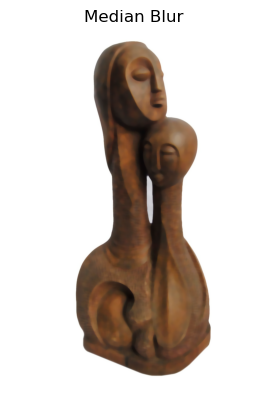

In [43]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox, simpledialog, filedialog
from PIL import Image, ImageTk

# User login Info
users = {
    "emeka anyanwu": {"email": "chukwuemekaanyanwu322@gmail.com", "age": 18},
    "bona chukwu": {"email": "bonachukwu1@gmail.com", "age": 17},
    "tabitha udezi": {"email": "tabithaudezi23@gmail.com", "age": 23},
    "abdullah salami": {"email": "abdullahsalami343@gmail.com", "age": 26},
}

# Directories to art collections
art_collections = {
    "cont_art": "./project/images/cont_art/",
    "modern_art": "./project/images/modern_art/",
    "trad_art": "./project/images/trad_art/"
}

class ArtApp:
    def __init__(self, root):
        self.root = root
        self.root.eval('tk::PlaceWindow . center')
        self.root.title("Art Viewer & Transformer")
        self.root.geometry("500x400")
        
        self.label = tk.Label(root, text="Enter your details", font=("Arial", 16))
        self.label.pack(pady=10)
        
        self.username_label = tk.Label(root, text="Enter your username:")
        self.username_label.pack()
        self.username_entry = tk.Entry(root)
        self.username_entry.pack()
        
        self.email_label = tk.Label(root, text="Enter you email:")
        self.email_label.pack()
        self.email_entry = tk.Entry(root)
        self.email_entry.pack()
        
        self.login_button = tk.Button(root, text="Login", command=self.verify_user)
        self.login_button.pack(pady=10)
        
    def verify_user(self):
        username = self.username_entry.get().strip().lower()
        email = self.email_entry.get().strip()
        
        if username in users and users[username]["email"] == email:
            user_age = users[username]["age"]
            if user_age >= 18:
                messagebox.showinfo("Authorized User!", f"Welcome {username.capitalize()}!")
                self.select_category()
            else:
                messagebox.showwarning("Access Denied", "You must be at least 18.")
        else:
            messagebox.showerror("Error", "Invalid credentials.")
    
    def select_category(self):
        category = simpledialog.askstring("Select Category", "Enter category (cont_art, modern_art, trad_art):").strip().lower()
        if category in art_collections:
            self.display_images(category)
        else:
            messagebox.showerror("Error", "Invalid category.")
    
    def display_images(self, category):
        folder_path = art_collections[category]
        if not os.path.exists(folder_path):
            messagebox.showerror("Error", f"Folder '{folder_path}' not found!")
            return
        
        images = [f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png", ".jpeg"))]
        if not images:
            messagebox.showwarning("No Images", "No images found in this category.")
            return
        
        img_window = tk.Toplevel(self.root)
        img_window.title("Select an Image")
        
        for img_name in images:
            img_path = os.path.join(folder_path, img_name)
            image = Image.open(img_path)
            image.thumbnail((150, 150))
            img_tk = ImageTk.PhotoImage(image)
            
            btn = tk.Button(img_window, image=img_tk, command=lambda path=img_path: self.apply_transformations(path))
            btn.image = img_tk
            btn.pack()
    
    def apply_transformations(self, image_path):
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        transformations = {
            "1": ("Median Blur", lambda img: cv2.medianBlur(img, max(3, int(simpledialog.askstring("Median Blur", "Enter a blur intensity (odd number):", parent=self.root) or 3) // 2 * 2 + 1) )),

            
            "2": ("Resize", lambda img: cv2.resize(img, 
                                       (int(simpledialog.askstring("Resize", "Enter the width:") or img.shape[1]), 
                                        int(simpledialog.askstring("Resize", "Enter the height:") or img.shape[0])))),
            
            "3": ("Brightness & Contrast", lambda img: cv2.addWeighted(img, float(simpledialog.askstring("Contrast", "Enter contrast value:") or 1.5), np.zeros(img.shape, img.dtype), 0, float(simpledialog.askstring("Brightness", "Enter brightness value:") or 5))),
            
            "4": ("Sharpen", lambda img: cv2.filter2D(img, -1, np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]))),

            "5": ("Scaling", lambda img: cv2.resize(img, None, fx=float(simpledialog.askstring("Scale X", "Enter X scaling factor:") or 2), fy=float(simpledialog.askstring("Scale Y", "Enter Y scaling factor:") or 3))),
            
            "6": ("Inverse", lambda img: 255 - img),
            
        }
        
        transform_window = tk.Toplevel(self.root)
        transform_window.title("Select a Transformation")
        
        for key, (name, func) in transformations.items():
            btn = tk.Button(transform_window, text=name, command=lambda n=name, f=func: self.show_transformed_image(image, image_path, n, f))
            btn.pack()
    
    def show_transformed_image(self, image, image_path, name, func):
        transformed_image = func(image)

        # img_window2 = tk.Toplevel(self.root)
        # trans_label = tk.Label(img_window2, "Tranformed Image")
        # trans_label.pack()
        plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
        plt.title(f"{name}")
        plt.axis("off")
        plt.show()
        
        save_path = f"transformed_{os.path.basename(image_path)}"
        cv2.imwrite(save_path, transformed_image)
        messagebox.showinfo("Saved", f"Transformed image saved as {save_path}")


root = tk.Tk()
app = ArtApp(root)
root.mainloop()

In [37]:
# import os
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import tkinter as tk
# from tkinter import messagebox, simpledialog, filedialog
# from PIL import Image, ImageTk

# # User login Info
# users = {
#     "emeka anyanwu": {"email": "chukwuemekaanyanwu322@gmail.com", "age": 18},
#     "bona chukwu": {"email": "bonachukwu1@gmail.com", "age": 17},
#     "tabitha udezi": {"email": "tabithaudezi23@gmail.com", "age": 23},
#     "abdullah salami": {"email": "abdullahsalami343@gmail.com", "age": 26},
# }

# # Directories to art collections
# art_collections = {
#     "cont_art": "./project/images/cont_art/",
#     "modern_art": "./project/images/modern_art/",
#     "trad_art": "./project/images/trad_art/"
# }

# class ArtApp:
#     def __init__(self, root):
#         self.root = root
#         self.root.eval('tk::PlaceWindow . center')
#         self.root.title("Art Viewer & Transformer")
#         self.root.geometry("500x400")
        
#         self.label = tk.Label(root, text="Enter your details", font=("Arial", 16))
#         self.label.pack(pady=10)
        
#         self.username_label = tk.Label(root, text="Enter your username:")
#         self.username_label.pack()
#         self.username_entry = tk.Entry(root)
#         self.username_entry.pack()
        
#         self.email_label = tk.Label(root, text="Enter you email:")
#         self.email_label.pack()
#         self.email_entry = tk.Entry(root)
#         self.email_entry.pack()
        
#         self.login_button = tk.Button(root, text="Login", command=self.verify_user)
#         self.login_button.pack(pady=10)
        
#     def verify_user(self):
#         username = self.username_entry.get().strip().lower()
#         email = self.email_entry.get().strip()
        
#         if username in users and users[username]["email"] == email:
#             user_age = users[username]["age"]
#             if user_age >= 18:
#                 messagebox.showinfo("Authorized User!", f"Welcome {username.capitalize()}!")
#                 self.select_category()
#             else:
#                 messagebox.showwarning("Access Denied", "You must be at least 18.")
#         else:
#             messagebox.showerror("Error", "Invalid credentials.")
    
#     def select_category(self):
#         category = simpledialog.askstring("Select Category", "Enter category (cont_art, modern_art, trad_art):").strip().lower()
#         if category in art_collections:
#             self.display_images(category)
#         else:
#             messagebox.showerror("Error", "Invalid category.")
    
#     def display_images(self, category):
#         folder_path = art_collections[category]
#         if not os.path.exists(folder_path):
#             messagebox.showerror("Error", f"Folder '{folder_path}' not found!")
#             return
        
#         images = [f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png", ".jpeg"))]
#         if not images:
#             messagebox.showwarning("No Images", "No images found in this category.")
#             return
        
#         img_window = tk.Toplevel(self.root)
#         img_window.title("Select an Image")
        
#         for img_name in images:
#             img_path = os.path.join(folder_path, img_name)
#             image = Image.open(img_path)
#             image.thumbnail((150, 150))
#             img_tk = ImageTk.PhotoImage(image)
            
#             btn = tk.Button(img_window, image=img_tk, command=lambda path=img_path: self.apply_transformations(path))
#             btn.image = img_tk
#             btn.pack()
    
#     def apply_transformations(self, image_path):
#         image = cv2.imread(image_path)
#         image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
#         transformations = {
#             "1": ("Median Blur", lambda img: cv2.medianBlur(img, max(3, int(simpledialog.askstring("Median Blur", "Enter a blur intensity (odd number):", parent=self.root) or 3) // 2 * 2 + 1) )),

            
#             "2": ("Resize", lambda img: cv2.resize(img, 
#                                        (int(simpledialog.askstring("Resize", "Enter the width:") or img.shape[1]), 
#                                         int(simpledialog.askstring("Resize", "Enter the height:") or img.shape[0])))),
            
#             "3": ("Brightness & Contrast", lambda img: cv2.addWeighted(img, float(simpledialog.askstring("Contrast", "Enter contrast value:") or 1.5), np.zeros(img.shape, img.dtype), 0, float(simpledialog.askstring("Brightness", "Enter brightness value:") or 5))),
            
#             "4": ("Sharpen", lambda img: cv2.filter2D(img, -1, np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]))),

#             "5": ("Scaling", lambda img: cv2.resize(img, None, fx=float(simpledialog.askstring("Scale X", "Enter X scaling factor:") or 2), fy=float(simpledialog.askstring("Scale Y", "Enter Y scaling factor:") or 3))),
            
#             "6": ("Inverse", lambda img: 255 - img),
            
#         }
        
#         transform_window = tk.Toplevel(self.root)
#         transform_window.title("Select a Transformation")
        
#         for key, (name, func) in transformations.items():
#             btn = tk.Button(transform_window, text=name, command=lambda n=name, f=func: self.show_transformed_image(image, image_path, n, f))
#             btn.pack()
    
#     def show_transformed_image(self, image, image_path, name, func):
#         # Apply transformation
#         transformed_image = func(image)

#         # Convert OpenCV image to PIL Image
#         image_rgb = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
#         pil_image = Image.fromarray(image_rgb)  # Convert to PIL Image

#         # Resize image for better display (optional)
#         pil_image = pil_image.resize((300, 300), Image.LANCZOS)

#         # Convert PIL Image to Tkinter-compatible format
#         img_tk = ImageTk.PhotoImage(pil_image)

#         # Create a new window
#         img_window2 = tk.Toplevel(self.root)
#         img_window2.title(f"Transformed Image - {name}")

#         # Label to display image
#         trans_label = tk.Label(img_window2, image=img_tk)
#         trans_label.image = img_tk  # Keep a reference to prevent garbage collection
#         trans_label.pack()

#         # Save the transformed image
#         save_path = f"transformed_{os.path.basename(image_path)}"
#         cv2.imwrite(save_path, transformed_image)
#         messagebox.showinfo("Saved", f"Transformed image saved as {save_path}")



# root = tk.Tk()
# app = ArtApp(root)
# root.mainloop()